# Data Analysis Interview Challenge

In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [439]:
login_times = pd.read_json('logins.json')

login_times['login_time'] = pd.to_datetime(login_times['login_time'])
login_times.set_index('login_time', inplace = True)

login_times.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [440]:
logins = login_times
logins['Login_Count'] = 1
logins = login_times.resample('15min').sum()

days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

logins['Day'] = logins.index.dayofweek


months = {1:'Jan',2:'Feb',3:'March',4:'April',
          5:'May',6:'June',7:'July',8:'Aug',
          9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

logins['Month'] = logins.index.month

logins['Hour'] = logins.index.hour

logins.head()

,Login_Count,Day,Month,Hour
login_time,,,,
1970-01-01 20:00:00,2,3,1,20
1970-01-01 20:15:00,6,3,1,20
1970-01-01 20:30:00,9,3,1,20
1970-01-01 20:45:00,7,3,1,20
1970-01-01 21:00:00,1,3,1,21


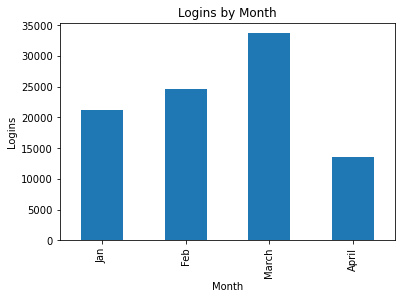

In [441]:
labels = [months[x] for x in logins['Month'].unique()]
ticks = [x-1 for x in logins['Month'].unique()]

logins.groupby('Month')['Login_Count'].sum().plot(kind = 'bar')
plt.xticks(labels = labels, ticks = ticks)
plt.ylabel('Logins')
plt.title('Logins by Month')
plt.show()


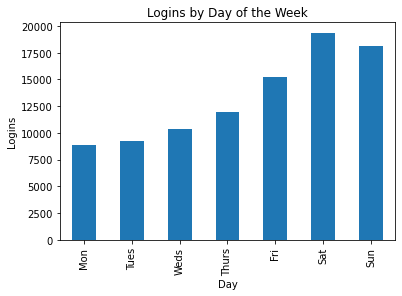

In [442]:
labels = [days[x] for x in logins['Day'].unique()]
ticks = [x for x in logins['Day'].unique()]

logins.groupby('Day')['Login_Count'].sum().plot(kind = 'bar')
plt.xticks(labels = labels, ticks = ticks)
plt.ylabel('Logins')
plt.title('Logins by Day of the Week')
plt.show()

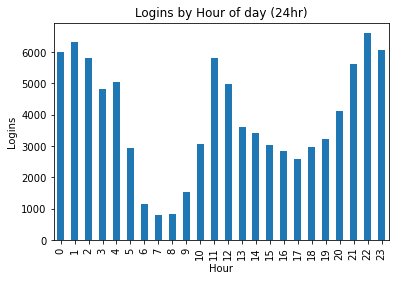

In [443]:
logins.groupby('Hour')['Login_Count'].sum().plot(kind = 'bar')
plt.title('Logins by Hour of day (24hr)')
plt.ylabel('Logins')
plt.show()

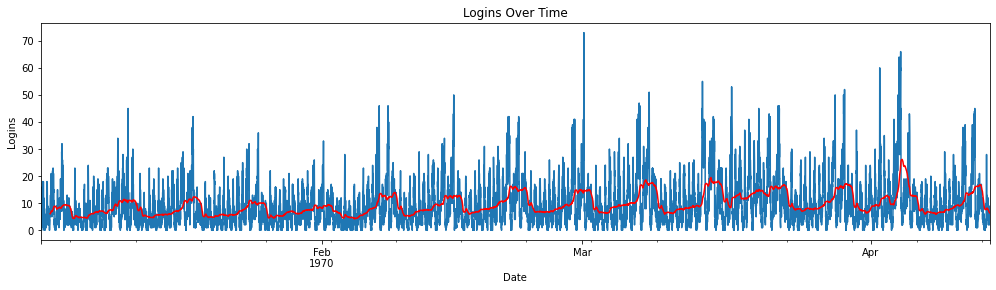

In [444]:
rolling_d = logins['Login_Count'].rolling(window =96)

logins['Login_Count'].plot(kind = 'line',figsize=(15,4), use_index = True)
rolling_d.mean().plot(kind = 'line',figsize=(17,4), color ='red')

plt.xlabel('Date')
plt.ylabel('Logins')
plt.title('Logins Over Time')

plt.show()

#### Observations
We can see a couple of trends from the data above.  First user logins have been increasing since January.  Data for April ends on 4/13 but at a little uder 2 weeks it has about 50% of January and February's logins. 

Second, peak logins happen during the weekend, where Saturday, Sunday, Friday are the top login days in that order.

Third there are 2 peaks of logins during the day, early afternoon and night time.  With the least number of logins hapening between 5am and 10am on average.  

## Part 2 

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

#### Response
I believe an obvious metric would be one that captures bridge crossings.  If there is no metric that explicitly shows the the number of bridge crossings, a driver's ride history would work as well.  If a driver services a ride in Metropolis and subsequently services a ride in Gotham, it could be assumed that they crossed the bridge.  Additionally since the peak hours are complementary, looking at the percent of rides in each city by driver by day may also provide insight.  

2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

#### Response
A)Using data from on Ultimate Metropolis and Gotham drivers logs, I would segment the data by pre-implementation and post implementation of the toll cost reimbursement.  I would then create a daily count per driver that would indicate a bridge crossing when a driver services a ride in one city after servicing a ride in the other city.  We would then have 2 distributions to compare.  A daily count of bridge crossings before and after implementations of the toll reimbursement policy. 

Another way to examine the effects of the experiment would be to look at the daily percentage of rides each driver has in each city.  Looking at how these percentages changed from pre toll reimbursement to post toll reimbursement will also give an indication of the effects of the policy.

B)In both methods we will be comparing 2 sample means, pre and post toll reimbursement policy. So a Z-test would be be appropriate.
    H0) Toll reimbursement policy does not change driver behavior
    H1) Toll reimbursement policy changes driver behavior.
    
C)If the daily bridge crossing counts have increased after toll reimbursement policy, then a permanent policy will likely increase driver mobility between cities.

If the percentage of daily rides in each city changes in any way, then a permanent policy will likely change driver behavior   

## Part 3

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

In [445]:
ultimate = pd.read_json('ultimate_data_challenge.json')

● city: city this user signed up in <br>
● phone: primary device for this user<br>
● signup_date: date of account registration; in the form ‘YYYYMMDD’<br>
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’<br>
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
● surge_pct: the percent of trips taken with surge multiplier > 1<br>
● avg_surge: The average surge multiplier over all of this user’s trips<br>
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up<br>
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise<br>
● weekday_pct: the percent of the user’s trips occurring during a weekday

### Data Cleaning

In [446]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [447]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [448]:
mean = ultimate['avg_rating_of_driver'].mean()
ultimate['avg_rating_of_driver'].fillna(mean, inplace = True)
ultimate.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [449]:
mean = ultimate['avg_rating_by_driver'].mean()
ultimate['avg_rating_by_driver'].fillna(mean, inplace = True)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [450]:
ultimate['phone'].fillna('Other', inplace = True)
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [451]:
ultimate['signup_date']=  pd.to_datetime(ultimate['signup_date'])
ultimate['last_trip_date']=  pd.to_datetime(ultimate['last_trip_date'])

In [452]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### EDA

In [453]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

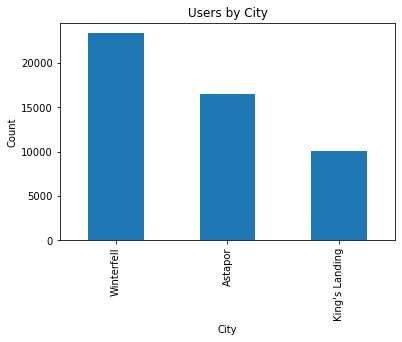

In [454]:
ultimate['city'].value_counts().plot(kind = 'bar')
plt.title('Users by City')
plt.ylabel('Count')
plt.xlabel('City')
plt.show()

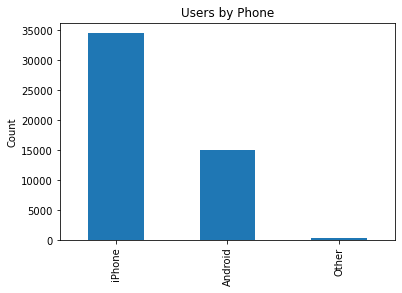

In [455]:
ultimate['phone'].value_counts().plot(kind = 'bar')
plt.title('Users by Phone')
plt.ylabel('Count')
plt.show()

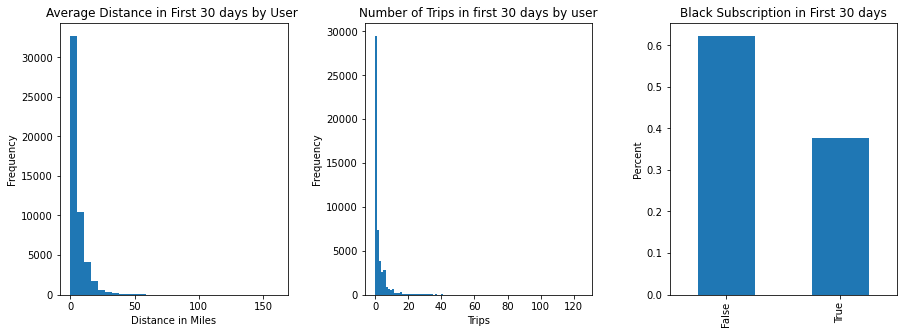

In [456]:
fig, ax = plt.subplots(nrows =1, ncols =3, figsize = (15,5))
plt.subplots_adjust( wspace=0.34)


ultimate['avg_dist'].plot(kind ='hist', bins =30, ax = ax[0])
ax[0].set_title('Average Distance in First 30 days by User ')
ax[0].set_xlabel('Distance in Miles')

ultimate['trips_in_first_30_days'].plot(kind= 'hist', bins = 100, ax= ax[1])
ax[1].set_title('Number of Trips in first 30 days by user')
ax[1].set_xlabel('Trips')

ultimate['ultimate_black_user'].value_counts(normalize = True).plot(kind ='bar')
ax[2].set_title('Black Subscription in First 30 days')
ax[2].set_ylabel('Percent')


plt.show()

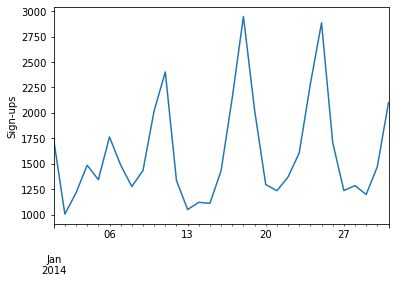

In [457]:
ultimate['signup_date'].value_counts().sort_index().plot()
plt.ylabel('Sign-ups')
plt.show()

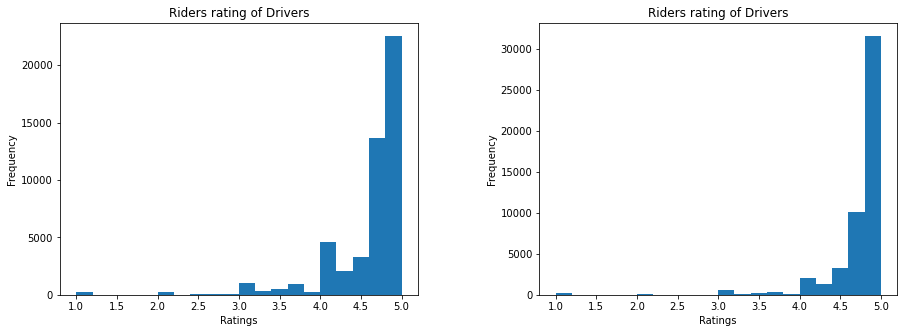

In [458]:
fig, ax = plt.subplots(nrows =1, ncols =2, figsize = (15,5))
plt.subplots_adjust( wspace=0.34)

ultimate['avg_rating_of_driver'].plot(kind = 'hist',bins= 20, ax =ax[0])
ax[0].set_title('Riders rating of Drivers')
ax[0].set_xlabel('Ratings')

ultimate['avg_rating_by_driver'].plot(kind = 'hist',bins= 20, ax = ax[1])
ax[1].set_title('Riders rating of Drivers')
ax[1].set_xlabel('Ratings')

plt.show()

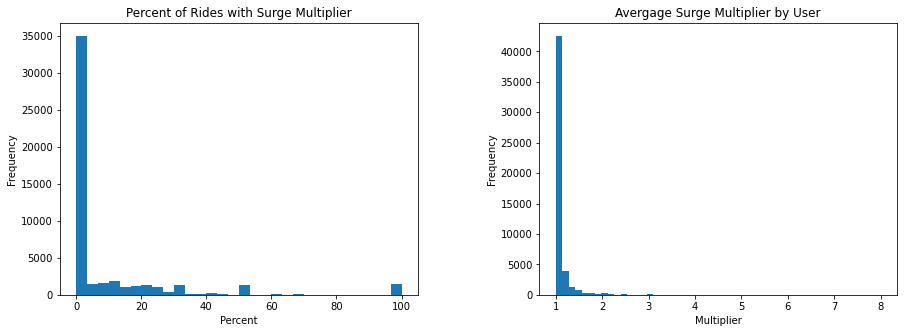

In [459]:
fig, ax = plt.subplots(nrows =1, ncols =2, figsize = (15,5))
plt.subplots_adjust( wspace=0.34)


ultimate['surge_pct'].plot(kind = 'hist', bins =30, ax = ax[0])
ax[0].set_title('Percent of Rides with Surge Multiplier')
ax[0].set_xlabel('Percent')


ultimate['avg_surge'].plot(kind = 'hist', bins =50, ax = ax[1])
ax[1].set_title('Avergage Surge Multiplier by User')
ax[1].set_xlabel('Multiplier')
plt.show()


In [460]:
end_date = ultimate['last_trip_date'].max()
start_date = end_date - pd.Timedelta(30, 'D')

ultimate['Active'] = [ True if x >= start_date else False for x in ultimate['last_trip_date']]

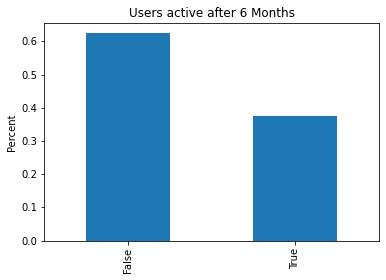

In [461]:
ultimate['Active'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Users active after 6 Months')
plt.ylabel('Percent')
plt.show()

About 37% of of Users were active after 6 months.

In [462]:
ultimate.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,Active
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,True
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,False
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,False
8,Winterfell,2,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,False
9,Winterfell,1,2014-01-03,4.601559,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,False


<AxesSubplot:>

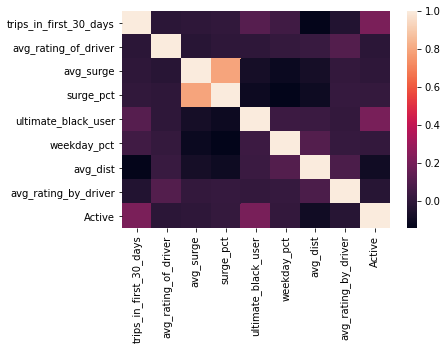

In [463]:
corr = ultimate.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

We can see that our target variable, user active in past 30 days, is somewhat correlated with the number of trips taken in the first 30 days from initial signup and whether the user signed up for a Ultimate Black Subscription. 

### Preprocessing

In [464]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [465]:
target = ultimate['Active']
features = ultimate.drop(['Active','signup_date','last_trip_date'], axis =1)

num_cols =list(features.select_dtypes('number').columns)

features = pd.get_dummies(features)

col_trans = ColumnTransformer([('scaler',StandardScaler(), num_cols)],remainder = 'passthrough')

X =col_trans.fit_transform(features)

y = target

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=343)

### Modeling

In [467]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Initital Modeling

In [468]:
def model_eval(model,X_train, y_train, X_test, y_test):
    print()
    print(str(model))
    print()
    
    model  = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
     
    confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion)
    
    disp.plot()
    plt.show()

In [469]:
Models = [LogisticRegression(random_state = 343),
          RandomForestClassifier(random_state = 343),
          KNeighborsClassifier()]


LogisticRegression(random_state=343)

              precision    recall  f1-score   support

       False       0.74      0.85      0.79     10308
        True       0.66      0.49      0.56      6192

    accuracy                           0.71     16500
   macro avg       0.70      0.67      0.68     16500
weighted avg       0.71      0.71      0.70     16500



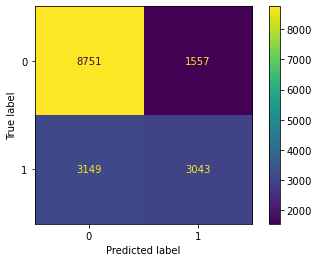


RandomForestClassifier(random_state=343)

              precision    recall  f1-score   support

       False       0.80      0.81      0.81     10308
        True       0.68      0.66      0.67      6192

    accuracy                           0.76     16500
   macro avg       0.74      0.74      0.74     16500
weighted avg       0.75      0.76      0.75     16500



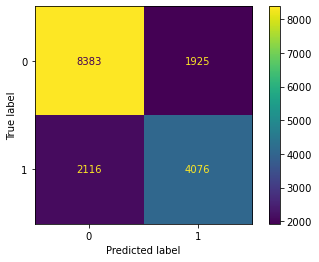


KNeighborsClassifier()

              precision    recall  f1-score   support

       False       0.78      0.81      0.80     10308
        True       0.67      0.62      0.64      6192

    accuracy                           0.74     16500
   macro avg       0.72      0.72      0.72     16500
weighted avg       0.74      0.74      0.74     16500



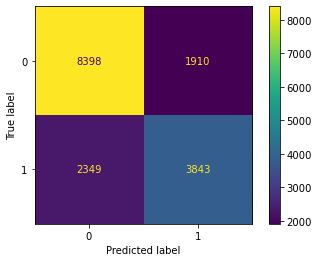

In [470]:
for model in Models:
    model_eval(model,X_train, y_train, X_test, y_test)

#### Optimizing Random Forest

In [471]:
from sklearn.model_selection import RandomizedSearchCV

In [472]:
random_grid ={'bootstrap': [True, False],
              'criterion': ['gini','entropy'],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800]}

RF = RandomForestClassifier(random_state = 343)

RandRF = RandomizedSearchCV(RF, random_grid, random_state = 343)

RandRF.fit(X_train,y_train)


RandomizedSearchCV(estimator=RandomForestClassifier(random_state=343),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=343)

In [473]:
RandRF.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [474]:
def model_eval2(model,X_train, y_train, X_test, y_test):
    print()
    print(str(model))
    print()
    
    model  = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred))
     
    confusion = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion)
    
    disp.plot()
    plt.show()
    
    return(model)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=600, random_state=343)

              precision    recall  f1-score   support

       False       0.80      0.87      0.83     10308
        True       0.74      0.65      0.69      6192

    accuracy                           0.78     16500
   macro avg       0.77      0.76      0.76     16500
weighted avg       0.78      0.78      0.78     16500



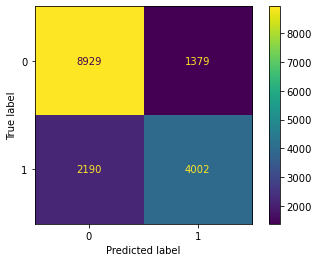

In [475]:
model = RandomForestClassifier(random_state = 343,
                               n_estimators = 600,
                               min_samples_split = 10,
                               min_samples_leaf = 2,
                               max_depth = 10,
                               criterion = 'gini',
                               bootstrap = True)

FitRFC = model_eval2(model,X_train, y_train, X_test, y_test)

From the original choice in models Random Forest had performed the best with the best overall accuracy and best over all F1 scores.  Consequently this model was better at predicting the class of interest, Active users.  This model was then optimized using hyperparameter tuning with RandomGrid search resulting in the model used above.  This model had an overall accuracy of 78% and F1 score of 83% when predicting inactive users and 69% when predicting Active users

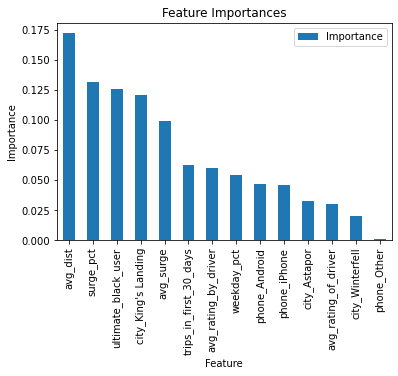

In [476]:
feature_imp = zip(features.columns,FitRFC.feature_importances_)

df_feat_imp = pd.DataFrame(feature_imp, columns = ['Feature', 'Importance'])
df_feat_imp = df_feat_imp.set_index('Feature')

df_feat_imp.sort_values(by = 'Importance', ascending =False).plot(kind= 'bar')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Conclusions:

It was found that the most important features in identifying Active users were:
1. Average Distance traveled
2. Percent of rides with 1+ surge multiplier
3. Whether user was a Black subscriber
4. Whether they were a Kings Landing subscriber
5. Average surge multiplier over all rides

Ultimate can leverage this information in a few ways.  It can target marketing campaigns around signing up Kings Landing residents, and increasing Ultimate Black subscriptions overall.  They will also want to create incentives to increase the average user ride distance.  
They also want to increase the percent of user rides with surge pricing, and the average surge multiplier over all rides.  Not by directly raising prices accross the board but by cutting surge pricing in areas of lower user rentention in order to increase AVG surge percent and AVG surge of users who may be on the margins. 